# Exploratory Data Analysis - Loan Case Study

## Author - ADITI NAMDEV

### Task - Perform ‘Exploratory Data Analysis’ on Loan datasets

### Problem Statement 

This case study aims to identify patterns which indicate if a client has difficulty paying their installments
which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to
risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying
the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan
default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge
for its portfolio and risk assessment

Dataset Description -
### 1. 'application_data.csv' contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

### 2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the
data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

### 3. 'columns_description.csv' is data dictionary which describes the meaning of the variables

#### *Dataset: https://drive.google.com/drive/folders/16RQztUqCfJOlbooHqYlJrp6Q7iL65uZB

## 1. Importing data and viewing 

In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

# 2. Loading the datasets into the data frame.

### (i) Application Data

In [3]:
df = pd.read_csv(r"C:\Users\Admin\application_data.csv",encoding='ISO-8859–1')
# To display the top 5 rows
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# To display the bottom 5 rows
df.tail(5) 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


### (ii) Previous Application Data

In [3]:
df2 = pd.read_csv(r"C:\Users\Admin\previous_application.csv",encoding='ISO-8859–1')
# To display the top 5 rows
df2.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# To display the bottom 5 rows
df2.tail(5) 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


### (iii) Columns Description Data

In [4]:
df3 = pd.read_csv(r"C:\Users\Admin\columns_description.csv",encoding='ISO-8859–1')
# To display the top 5 rows
df3.head(5)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [17]:
# To display the bottom 5 rows
df3.tail(5) 

,Unnamed: 0,Table,Row,Description,Special
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application
159,213,previous_application.csv,NFLAG_INSURED_ON_APPROVAL,Did the client requested insurance during the ...,NaN


## 3. Checking the types of data

### (i) Application Data

In [18]:
# Checking the data type
df.dtypes

Unnamed: 0      int64
Table          object
Row            object
Description    object
Special        object
dtype: object

### (ii) Previous Application Data

In [19]:
# Checking the data type
df2.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

### (iii) Columns Description Data

In [20]:
# Checking the data type
df3.dtypes

Unnamed: 0      int64
Table          object
Row            object
Description    object
Special        object
dtype: object

## • Data Imbalance

In [11]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.0


In [12]:
import numpy as np
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### SMOTE for Balancing Data

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


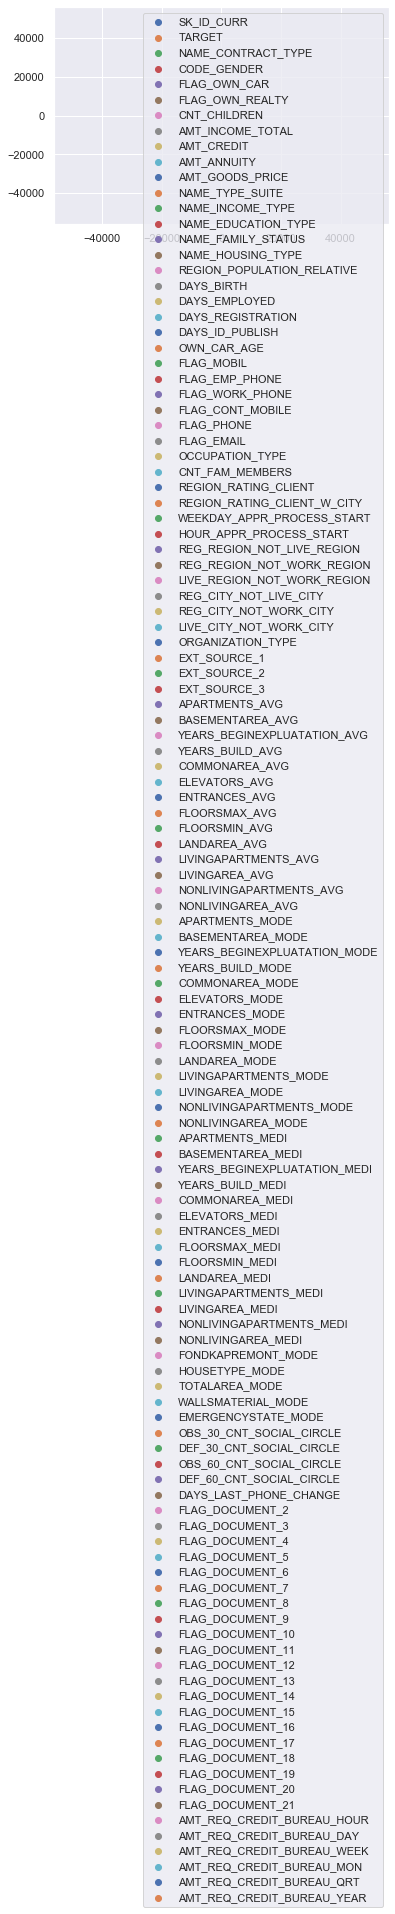

In [16]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = df
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [17]:
Counter({0: 9900, 1: 100})

Counter({0: 9900, 1: 100})

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

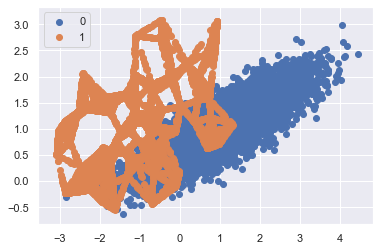

In [19]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = df
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [20]:
Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})

Counter({0: 9900, 1: 9900})

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

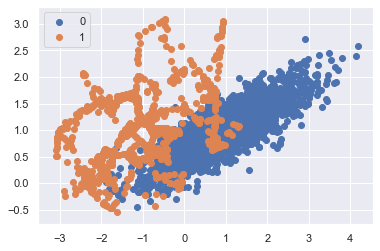

In [21]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = df
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [23]:
Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})

Counter({0: 1980, 1: 990})

## 4. Dropping irrelevant columns

### (i) Application Data

In [24]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

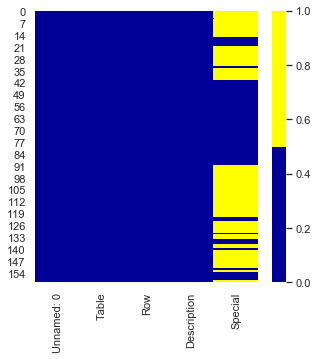

In [25]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [26]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Table - 0%
Row - 0%
Description - 0%
Special - 57%


In [33]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 10

created missing indicator for: Special


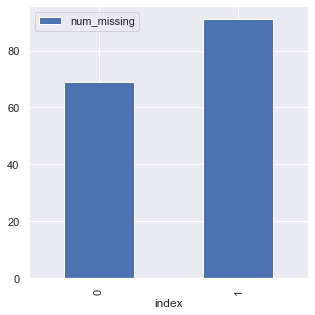

In [39]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

### (ii) Previous Application Data

In [35]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

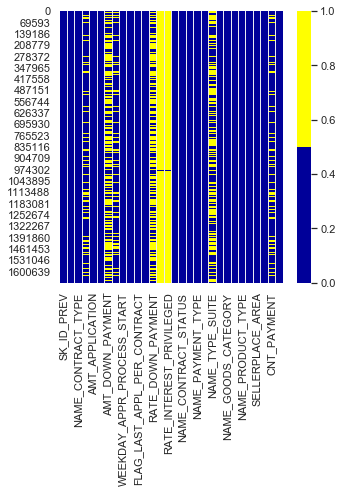

In [40]:
cols = df2.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df2[cols].isnull(), cmap=sns.color_palette(colours))

In [41]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

SK_ID_PREV - 0%
SK_ID_CURR - 0%
NAME_CONTRACT_TYPE - 0%
AMT_ANNUITY - 22%
AMT_APPLICATION - 0%
AMT_CREDIT - 0%
AMT_DOWN_PAYMENT - 54%
AMT_GOODS_PRICE - 23%
WEEKDAY_APPR_PROCESS_START - 0%
HOUR_APPR_PROCESS_START - 0%
FLAG_LAST_APPL_PER_CONTRACT - 0%
NFLAG_LAST_APPL_IN_DAY - 0%
RATE_DOWN_PAYMENT - 54%
RATE_INTEREST_PRIMARY - 100%
RATE_INTEREST_PRIVILEGED - 100%
NAME_CASH_LOAN_PURPOSE - 0%
NAME_CONTRACT_STATUS - 0%
DAYS_DECISION - 0%
NAME_PAYMENT_TYPE - 0%
CODE_REJECT_REASON - 0%
NAME_TYPE_SUITE - 49%
NAME_CLIENT_TYPE - 0%
NAME_GOODS_CATEGORY - 0%
NAME_PORTFOLIO - 0%
NAME_PRODUCT_TYPE - 0%
CHANNEL_TYPE - 0%
SELLERPLACE_AREA - 0%
NAME_SELLER_INDUSTRY - 0%
CNT_PAYMENT - 22%
NAME_YIELD_GROUP - 0%
PRODUCT_COMBINATION - 0%
DAYS_FIRST_DRAWING - 40%
DAYS_FIRST_DUE - 40%
DAYS_LAST_DUE_1ST_VERSION - 40%
DAYS_LAST_DUE - 40%
DAYS_TERMINATION - 40%
NFLAG_INSURED_ON_APPROVAL - 40%


created missing indicator for: AMT_ANNUITY
created missing indicator for: AMT_CREDIT
created missing indicator for: AMT_DOWN_PAYMENT
created missing indicator for: AMT_GOODS_PRICE
created missing indicator for: RATE_DOWN_PAYMENT
created missing indicator for: RATE_INTEREST_PRIMARY
created missing indicator for: RATE_INTEREST_PRIVILEGED
created missing indicator for: NAME_TYPE_SUITE
created missing indicator for: CNT_PAYMENT
created missing indicator for: PRODUCT_COMBINATION
created missing indicator for: DAYS_FIRST_DRAWING
created missing indicator for: DAYS_FIRST_DUE
created missing indicator for: DAYS_LAST_DUE_1ST_VERSION
created missing indicator for: DAYS_LAST_DUE
created missing indicator for: DAYS_TERMINATION
created missing indicator for: NFLAG_INSURED_ON_APPROVAL


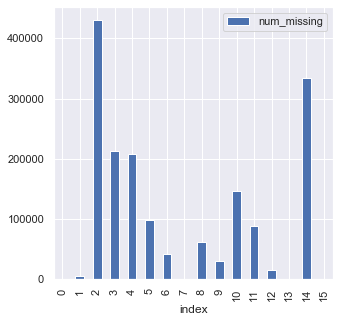

In [44]:
# first create missing indicator for features with missing data
for col in df2.columns:
    missing = df2[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df2['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df2.columns if 'ismissing' in col]
df2['num_missing'] = df2[ismissing_cols].sum(axis=1)

df2['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

### (iii) Columns Description Data

In [45]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

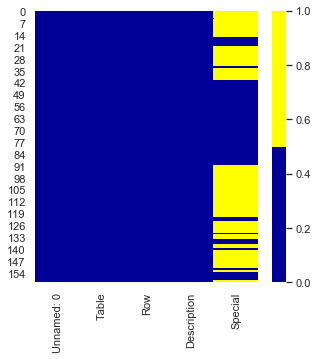

In [46]:
cols = df3.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df3[cols].isnull(), cmap=sns.color_palette(colours))

In [48]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df3.columns:
    pct_missing = np.mean(df3[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Table - 0%
Row - 0%
Description - 0%
Special - 57%


created missing indicator for: Special


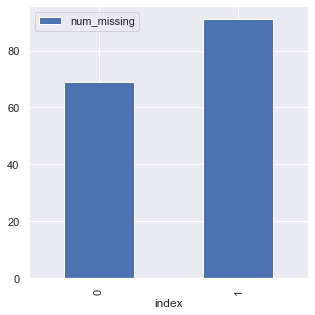

In [49]:
# first create missing indicator for features with missing data
for col in df3.columns:
    missing = df3[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df3['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df3.columns if 'ismissing' in col]
df3['num_missing'] = df3[ismissing_cols].sum(axis=1)

df3['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

## 5. Dropping the duplicate rows

### (i) Application Data

In [51]:
# Total number of rows and columns
df.shape
(11914, 10)
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows:', duplicate_rows_df.shape)

number of duplicate rows: (0, 7)


### (ii) Previous Application Data

In [59]:
# Total number of rows and columns
df2.shape
(11914, 10)
# Rows containing duplicate data
duplicate_rows_df2 = df2[df2.duplicated()]
print('number of duplicate rows:', duplicate_rows_df2.shape)

number of duplicate rows: (0, 54)


### (iii) Columns Description Data

In [58]:
# Total number of rows and columns
df3.shape
(11914, 10)
# Rows containing duplicate data
duplicate_rows_df3 = df3[df3.duplicated()]
print('number of duplicate rows:', duplicate_rows_df3.shape)

number of duplicate rows: (0, 7)


## 6. Dropping the missing or null values.

### (i) Application Data

In [60]:
# Finding the null values.
print(df.isnull().sum())

Unnamed: 0            0
Table                 0
Row                   0
Description           0
Special              91
Special_ismissing     0
num_missing           0
dtype: int64


In [20]:
# Dropping the missing values.
df = df.dropna() 
df.count()

SK_ID_CURR                    8602
TARGET                        8602
NAME_CONTRACT_TYPE            8602
CODE_GENDER                   8602
FLAG_OWN_CAR                  8602
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     8602
AMT_REQ_CREDIT_BUREAU_WEEK    8602
AMT_REQ_CREDIT_BUREAU_MON     8602
AMT_REQ_CREDIT_BUREAU_QRT     8602
AMT_REQ_CREDIT_BUREAU_YEAR    8602
Length: 122, dtype: int64

In [21]:
# After dropping the values
print(df.isnull().sum()) 

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64


### (ii) Previous Application Data

In [63]:
# Finding the null values.
print(df2.isnull().sum())

SK_ID_PREV                                   0
SK_ID_CURR                                   0
NAME_CONTRACT_TYPE                           0
AMT_ANNUITY                             372235
AMT_APPLICATION                              0
AMT_CREDIT                                   1
AMT_DOWN_PAYMENT                        895844
AMT_GOODS_PRICE                         385515
WEEKDAY_APPR_PROCESS_START                   0
HOUR_APPR_PROCESS_START                      0
FLAG_LAST_APPL_PER_CONTRACT                  0
NFLAG_LAST_APPL_IN_DAY                       0
RATE_DOWN_PAYMENT                       895844
RATE_INTEREST_PRIMARY                  1664263
RATE_INTEREST_PRIVILEGED               1664263
NAME_CASH_LOAN_PURPOSE                       0
NAME_CONTRACT_STATUS                         0
DAYS_DECISION                                0
NAME_PAYMENT_TYPE                            0
CODE_REJECT_REASON                           0
NAME_TYPE_SUITE                         820405
NAME_CLIENT_T

In [6]:
# Dropping the missing values.
df2 = df2.dropna() 
df2.count()

SK_ID_PREV                     71
SK_ID_CURR                     71
NAME_CONTRACT_TYPE             71
AMT_ANNUITY                    71
AMT_APPLICATION                71
AMT_CREDIT                     71
AMT_DOWN_PAYMENT               71
AMT_GOODS_PRICE                71
WEEKDAY_APPR_PROCESS_START     71
HOUR_APPR_PROCESS_START        71
FLAG_LAST_APPL_PER_CONTRACT    71
NFLAG_LAST_APPL_IN_DAY         71
RATE_DOWN_PAYMENT              71
RATE_INTEREST_PRIMARY          71
RATE_INTEREST_PRIVILEGED       71
NAME_CASH_LOAN_PURPOSE         71
NAME_CONTRACT_STATUS           71
DAYS_DECISION                  71
NAME_PAYMENT_TYPE              71
CODE_REJECT_REASON             71
NAME_TYPE_SUITE                71
NAME_CLIENT_TYPE               71
NAME_GOODS_CATEGORY            71
NAME_PORTFOLIO                 71
NAME_PRODUCT_TYPE              71
CHANNEL_TYPE                   71
SELLERPLACE_AREA               71
NAME_SELLER_INDUSTRY           71
CNT_PAYMENT                    71
NAME_YIELD_GRO

In [65]:
# After dropping the values
print(df2.isnull().sum()) 

SK_ID_PREV                             0
SK_ID_CURR                             0
NAME_CONTRACT_TYPE                     0
AMT_ANNUITY                            0
AMT_APPLICATION                        0
AMT_CREDIT                             0
AMT_DOWN_PAYMENT                       0
AMT_GOODS_PRICE                        0
WEEKDAY_APPR_PROCESS_START             0
HOUR_APPR_PROCESS_START                0
FLAG_LAST_APPL_PER_CONTRACT            0
NFLAG_LAST_APPL_IN_DAY                 0
RATE_DOWN_PAYMENT                      0
RATE_INTEREST_PRIMARY                  0
RATE_INTEREST_PRIVILEGED               0
NAME_CASH_LOAN_PURPOSE                 0
NAME_CONTRACT_STATUS                   0
DAYS_DECISION                          0
NAME_PAYMENT_TYPE                      0
CODE_REJECT_REASON                     0
NAME_TYPE_SUITE                        0
NAME_CLIENT_TYPE                       0
NAME_GOODS_CATEGORY                    0
NAME_PORTFOLIO                         0
NAME_PRODUCT_TYP

### (iii Columns Description Data

In [66]:
# Finding the null values.
print(df3.isnull().sum())

Unnamed: 0            0
Table                 0
Row                   0
Description           0
Special              91
Special_ismissing     0
num_missing           0
dtype: int64


In [8]:
# Dropping the missing values.
df3 = df3.dropna() 
df3.count()

Unnamed: 0     69
Table          69
Row            69
Description    69
Special        69
dtype: int64

In [9]:
# After dropping the values
print(df3.isnull().sum()) 

Unnamed: 0     0
Table          0
Row            0
Description    0
Special        0
dtype: int64


In [45]:
sudo pip install imbalanced-learn

SyntaxError: invalid syntax (<ipython-input-45-8d3a189e88a7>, line 1)

## 7. Detecting Outliers

### (i) Application Data

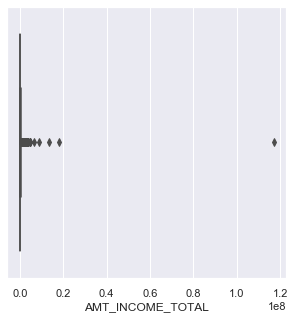

In [76]:
df = pd.read_csv(r"C:\Users\Admin\application_data.csv",encoding='ISO-8859–1')
sns.boxplot(x=df['AMT_INCOME_TOTAL'])

- Thus we can see rows of income amount ranging from 0.2 towards 1.2 are outlier points

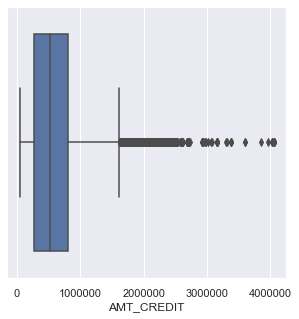

In [77]:
sns.boxplot(x=df['AMT_CREDIT'])

- Thus we can see rows of credit amount ranging from 2000000 towards 4000000 are outlier points

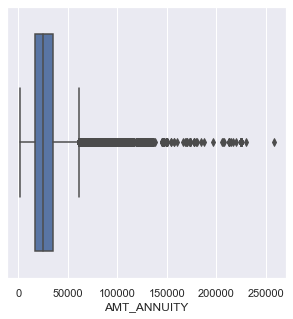

In [78]:
sns.boxplot(x=df['AMT_ANNUITY'])

- Thus we can see rows of annuity amount ranging from 65000 towards 260000 are outlier points

In [81]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SK_ID_CURR                    177997.0
TARGET                             0.0
CNT_CHILDREN                       1.0
AMT_INCOME_TOTAL               90000.0
AMT_CREDIT                    538650.0
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0
AMT_REQ_CREDIT_BUREAU_WEEK         0.0
AMT_REQ_CREDIT_BUREAU_MON          0.0
AMT_REQ_CREDIT_BUREAU_QRT          0.0
AMT_REQ_CREDIT_BUREAU_YEAR         3.0
Length: 106, dtype: float64


In [84]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(26808, 122)

### (ii) Previous Application Data

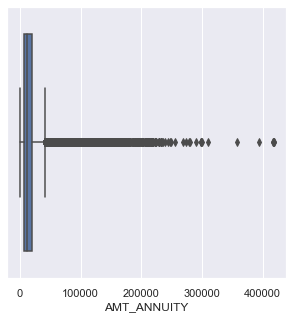

In [86]:
df2 = pd.read_csv(r"C:\Users\Admin\previous_application.csv",encoding='ISO-8859–1')
sns.boxplot(x=df2['AMT_ANNUITY'])

- Thus we can see rows of annuity amount ranging from 45000 towards 420000 are outlier points

In [4]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 50
plt.rcParams["figure.figsize"] = fig_size

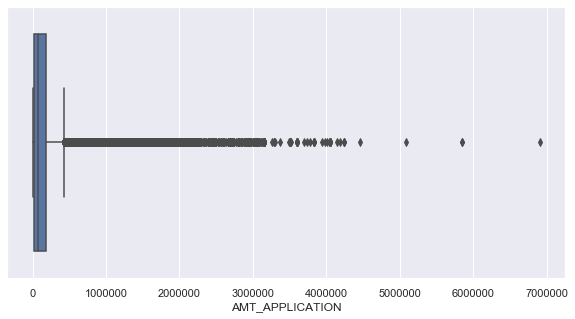

In [96]:
sns.boxplot(x=df2['AMT_APPLICATION'])

- Thus we can see the range of application count from 4000000 towards 7500000 are outlier points

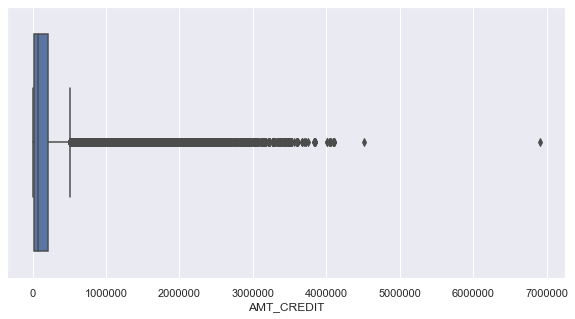

In [97]:
sns.boxplot(x=df2['AMT_CREDIT'])

- Thus we can see rows of credit amount ranging from 400000 towards 4500000 are outlier points

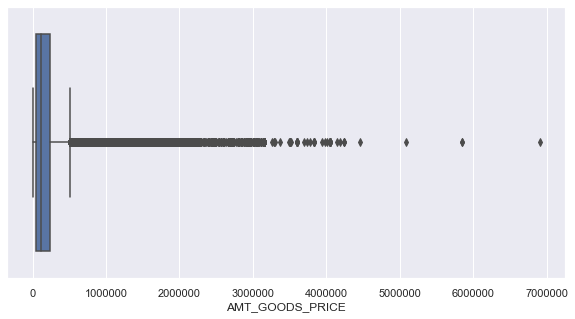

In [98]:
sns.boxplot(x=df2['AMT_GOODS_PRICE'])

- Thus we can see rows of goods price amount ranging from 460000 towards 7000000 are outlier points

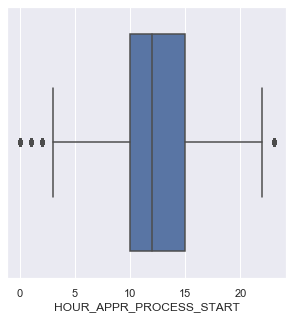

In [91]:
sns.boxplot(x=df2['HOUR_APPR_PROCESS_START'])

- Thus we can see rows of hours taken to start approval process ranging from 0-3 and 23 above are outlier points

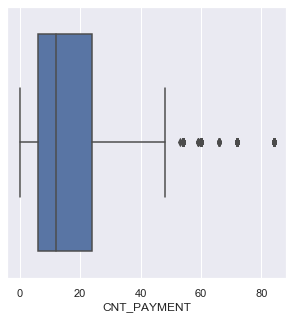

In [92]:
sns.boxplot(x=df2['CNT_PAYMENT'])

- Thus we can see rows of cnt payment ranging from 47 and above are outlier points

In [101]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SK_ID_PREV                   922422.500000
SK_ID_CURR                   178185.000000
AMT_ANNUITY                   14336.640000
AMT_APPLICATION              161640.000000
AMT_CREDIT                   192258.000000
AMT_DOWN_PAYMENT               7740.000000
AMT_GOODS_PRICE              183159.000000
HOUR_APPR_PROCESS_START           5.000000
NFLAG_LAST_APPL_IN_DAY            0.000000
RATE_DOWN_PAYMENT                 0.108909
RATE_INTEREST_PRIMARY             0.032614
RATE_INTEREST_PRIVILEGED          0.136892
DAYS_DECISION                  1020.000000
SELLERPLACE_AREA                 83.000000
CNT_PAYMENT                      18.000000
DAYS_FIRST_DRAWING                0.000000
DAYS_FIRST_DUE                 1217.000000
DAYS_LAST_DUE_1ST_VERSION      1371.000000
DAYS_LAST_DUE                  1240.000000
DAYS_TERMINATION               1226.000000
NFLAG_INSURED_ON_APPROVAL         1.000000
dtype: float64


In [103]:
df2 = df2[~((df2 < (Q1-1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(972697, 37)

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.


## 8. Univariate Analysis

### a) Categorical Unordered Univariate Analysis :

### (i) Application Data

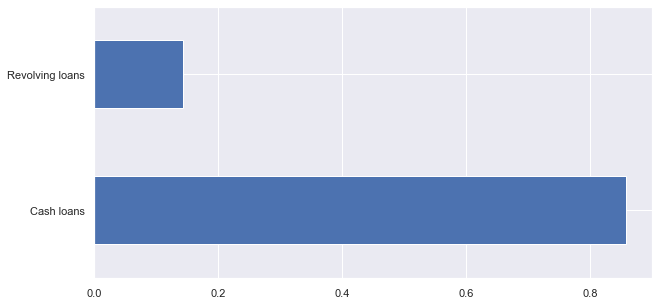

In [104]:
# Let's calculate the percentage of each loan category.
df.NAME_CONTRACT_TYPE.value_counts(normalize=True)

#plot the bar graph of percentage loan categories
df.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

- We can see that majority of loan applicants have chosen to opt for a Cash Loan rather than a Revolving Loan. Thus the company can improve the facilities and schemes for Cash loans and focus better on the same.

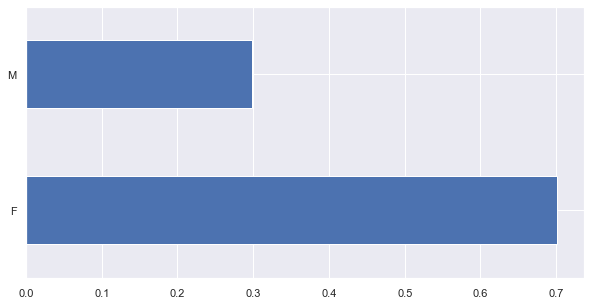

In [105]:
# Let's calculate the percentage of each gender category.
df.CODE_GENDER.value_counts(normalize=True)

#plot the bar graph of percentage gender categories
df.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()

- More females have applied for a loan rather than males. Consequently better features and special attention should be given to make the loan process smoother for females.

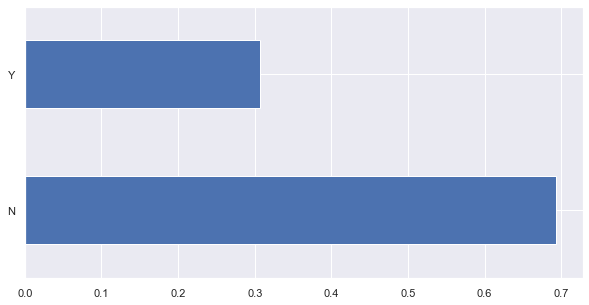

In [106]:
# Let's calculate the percentage of each car owning category.
df.FLAG_OWN_CAR.value_counts(normalize=True)

#plot the bar graph of percentage car owning categories
df.FLAG_OWN_CAR.value_counts(normalize=True).plot.barh()
plt.show()

- Majority of applicants don't own a car 

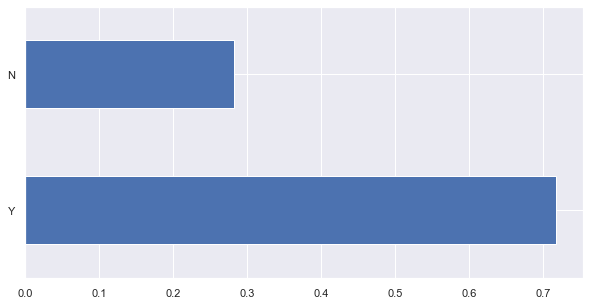

In [107]:
# Let's calculate the percentage of each property owning category.
df.FLAG_OWN_REALTY.value_counts(normalize=True)

#plot the bar graph of percentage property owning categories
df.FLAG_OWN_REALTY.value_counts(normalize=True).plot.barh()
plt.show()

- Majority of loan applicants have a property. Thus more secured loans can be provided to them at better rates. 

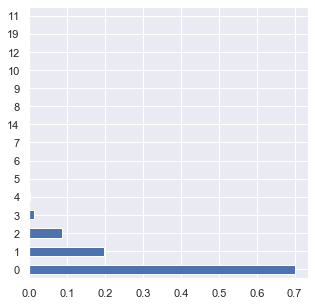

In [43]:
# Let's calculate the percentage of each children bearing category.
df.CNT_CHILDREN.value_counts(normalize=True)

#plot the bar graph of percentage children bearing categories
df.CNT_CHILDREN.value_counts(normalize=True).plot.barh()
plt.show()

- Thus majority of loan applicants have either no children or one child.

In [27]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 50
plt.rcParams["figure.figsize"] = fig_size

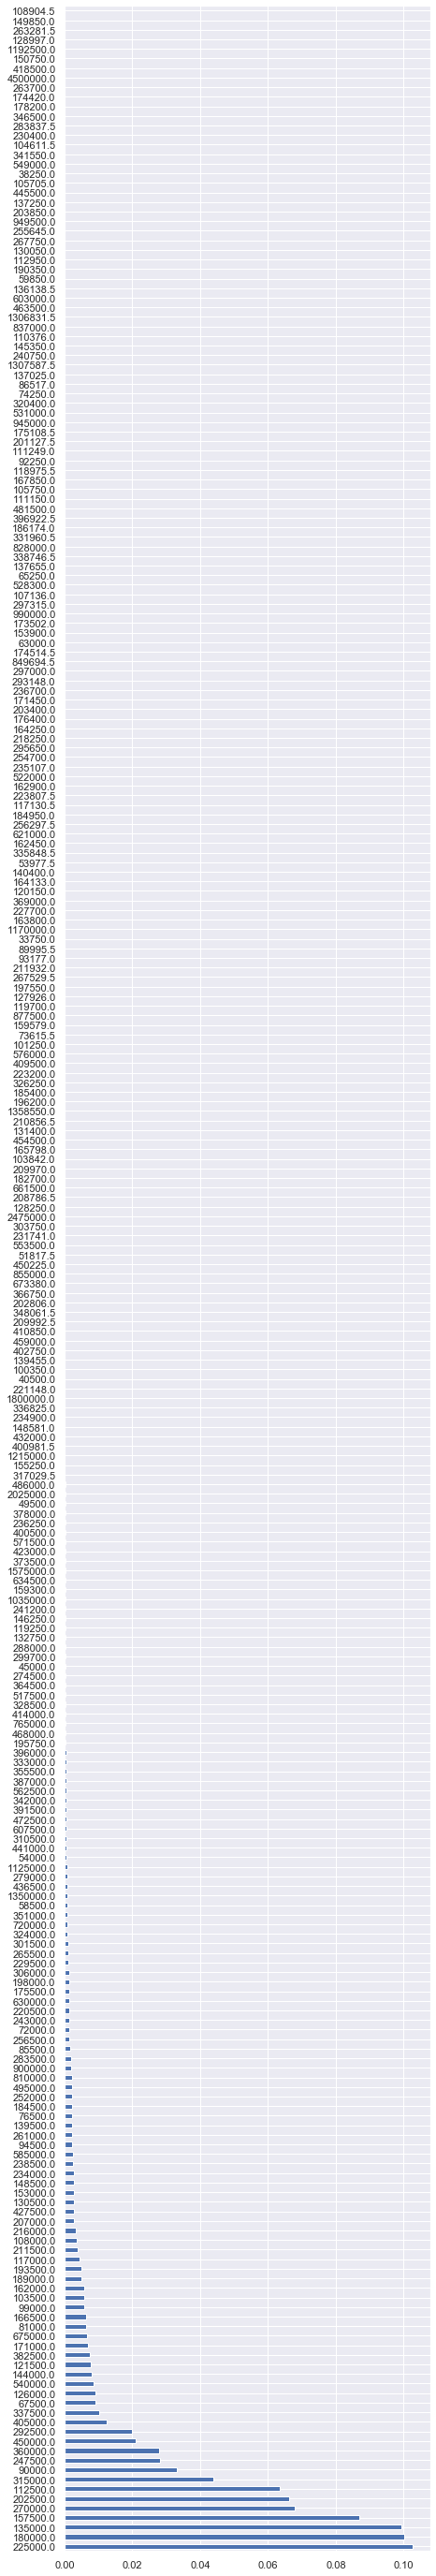

In [28]:
# Let's calculate the percentage of each income level category.
df.AMT_INCOME_TOTAL.value_counts(normalize=True)

#plot the bar graph of percentage income level categories
df.AMT_INCOME_TOTAL.value_counts(normalize=True).plot.barh()
plt.show()

- Thus we can see average highest income is around 125000. Thus accordingly rate of interests could be decided. 

### (ii) Previous Application Data

In [129]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

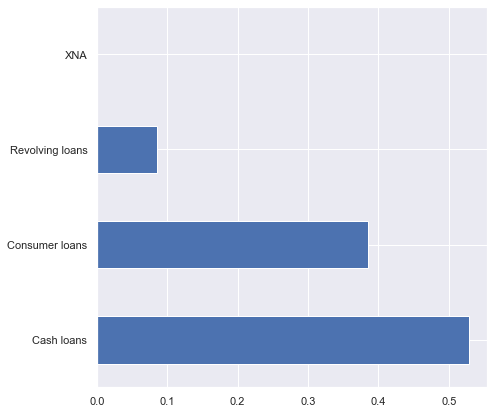

In [130]:
# Let's calculate the percentage of each loan category.
df2.NAME_CONTRACT_TYPE.value_counts(normalize=True)

#plot the bar graph of percentage loan categories
df2.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

- Thus according to previous data, majority of applicants applied for cash or consumer loans. 

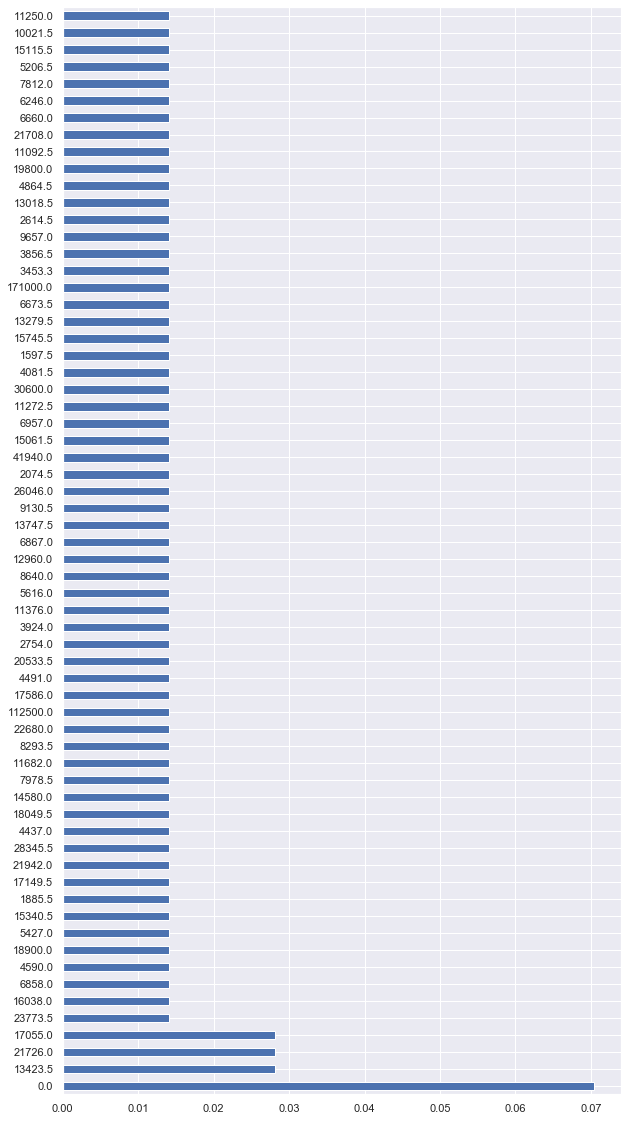

In [22]:
# Let's calculate the percentage of each downpayment amount category.
df2.AMT_DOWN_PAYMENT.value_counts(normalize=True)

#plot the bar graph of percentage downpayment amount categories
df2.AMT_DOWN_PAYMENT.value_counts(normalize=True).plot.barh()
plt.show()

- Thus majority of previous data applicants paid no down payment,

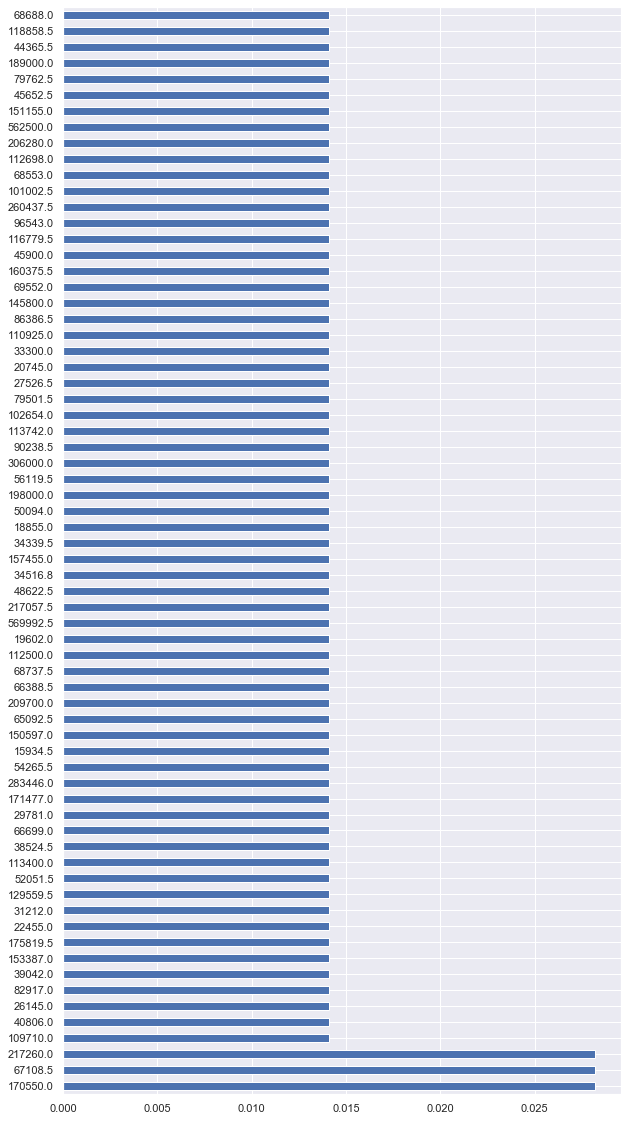

In [23]:
# Let's calculate the percentage of each job goods price category.
df2.AMT_GOODS_PRICE.value_counts(normalize=True)

#plot the bar graph of percentage goods price categories
df2.AMT_GOODS_PRICE.value_counts(normalize=True).plot.barh()
plt.show()

- Thus majority of goods price was around 67000

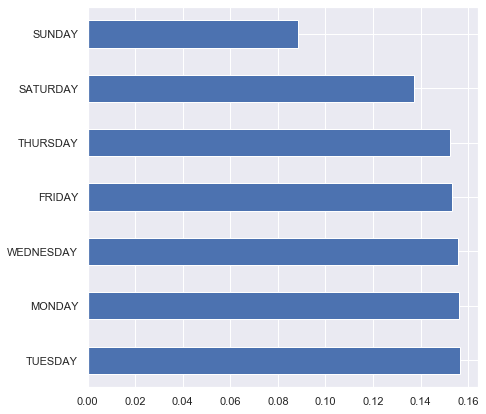

In [133]:
# Let's calculate the percentage of each weekday process category.
df2.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)

#plot the bar graph of percentage weekday process categories
df2.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.barh()
plt.show()

- We can see majorly loans were processed and approved on weekdays

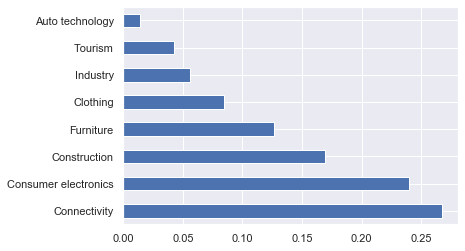

In [10]:
# Let's calculate the percentage of each seller industry category.
df2.NAME_SELLER_INDUSTRY.value_counts(normalize=True)

#plot the bar graph of percentage seller industry categories
df2.NAME_SELLER_INDUSTRY.value_counts(normalize=True).plot.barh()
plt.show()

- Previous data of applications also shows majority of applicants being from connectivity industry

### b) Categorical Ordered Univariate Analysis : 

### (i) Application Data

In [39]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

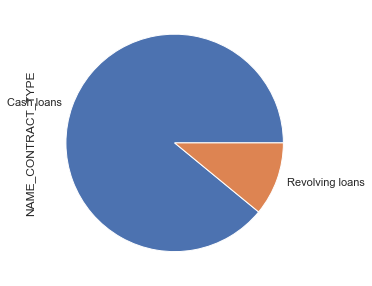

In [28]:
#calculate the percentage of each loan category.
df.NAME_CONTRACT_TYPE.value_counts(normalize=True)

#plot the pie chart of loan categories
df.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

- Majority of loans are cash loans

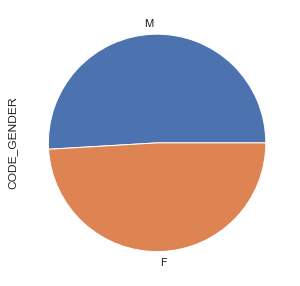

In [29]:
#calculate the percentage of each gender category.
df.CODE_GENDER.value_counts(normalize=True)

#plot the pie chart of gender categories
df.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.show()

- Males Females have almost equally applied for loans

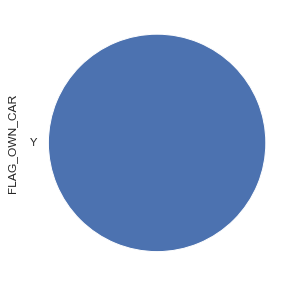

In [30]:
#calculate the percentage of each car owning category.
df.FLAG_OWN_CAR.value_counts(normalize=True)

#plot the pie chart of car owning categories
df.FLAG_OWN_CAR.value_counts(normalize=True).plot.pie()
plt.show()

- All applicants owned cars in previous data of loan applicants

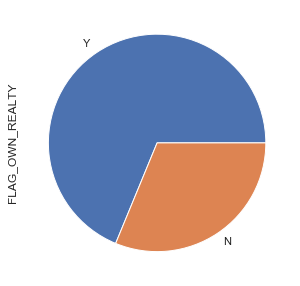

In [31]:
#calculate the percentage of each property owning category.
df.FLAG_OWN_REALTY.value_counts(normalize=True)

#plot the pie chart of property owning categories
df.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie()
plt.show()

- Majority of applicants owned property

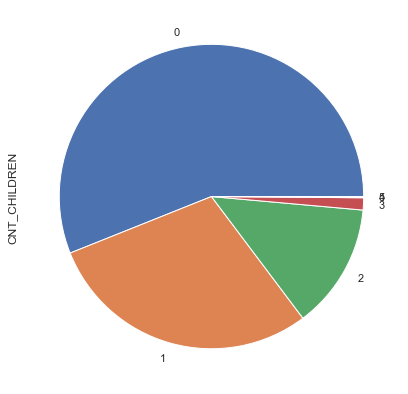

In [34]:
#calculate the percentage of each children bearing category.
df.CNT_CHILDREN.value_counts(normalize=True)

#plot the pie chart of children bearing categories
df.CNT_CHILDREN.value_counts(normalize=True).plot.pie()
plt.show()

- Majorly applicants had no children

In [36]:
df.NAME_CONTRACT_TYPE.describe()

count           8602
unique             2
top       Cash loans
freq            7660
Name: NAME_CONTRACT_TYPE, dtype: object

### (ii) Previous Application Data

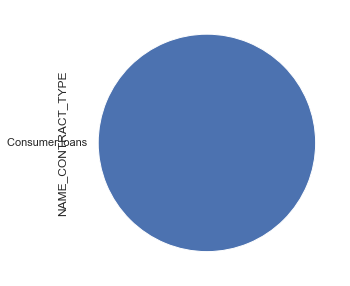

In [40]:
#calculate the percentage of each loan category.
df2.NAME_CONTRACT_TYPE.value_counts(normalize=True)

#plot the pie chart of loan categories
df2.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

- Previous data shows all applicants wanted consumer loans 

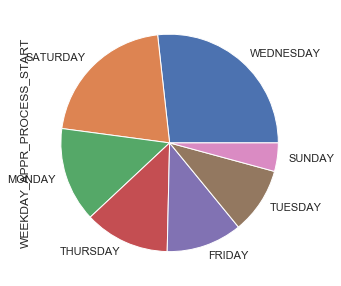

In [41]:
#calculate the percentage of each weekday process category.
df2.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)

#plot the pie chart of weekday process categories
df2.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.pie()
plt.show()

- Majority of loan processes are initiated in midweek. Accordingly task force could be guided. 

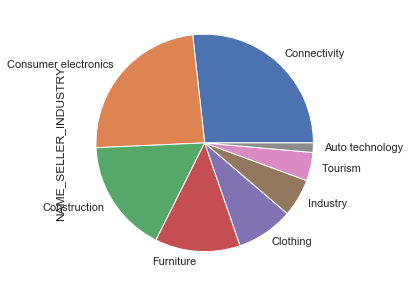

In [42]:
#calculate the percentage of each seller industry category.
df2.NAME_SELLER_INDUSTRY.value_counts(normalize=True)

#plot the pie chart of seller industry categories
df2.NAME_SELLER_INDUSTRY.value_counts(normalize=True).plot.pie()
plt.show()

- Most of the loan applicants come from Connectivity industry and Consumer Electronic business industries. Accordingly help could be provided to them and relative schemes could be implemented to attract them better.

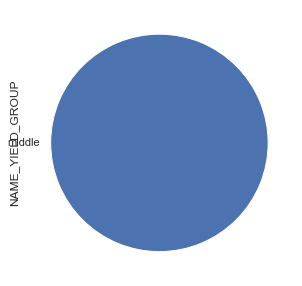

In [43]:
#calculate the percentage of each yield category.
df2.NAME_YIELD_GROUP.value_counts(normalize=True)

#plot the pie chart of yield categories
df2.NAME_YIELD_GROUP.value_counts(normalize=True).plot.pie()
plt.show()

- All yields were middle level based

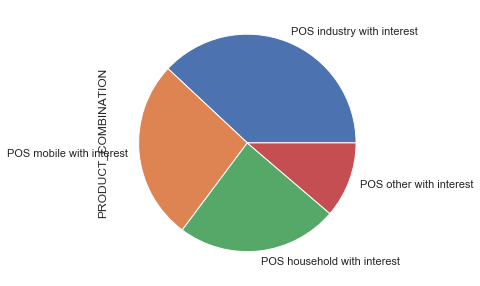

In [44]:
#calculate the percentage of each product combination category.
df2.PRODUCT_COMBINATION.value_counts(normalize=True)

#plot the pie chart of product combination categories
df2.PRODUCT_COMBINATION.value_counts(normalize=True).plot.pie()
plt.show()

- Most POS are industry specific based. As concluded earlier the Connectivity industry for example has higher possibility of opting for a loan. POST is second highest with ranging mobiles interests.

## 9. Bivariate Analysis

### a) Numeric-Numeric Analysis : Scatter Plot

### (i) Application Data

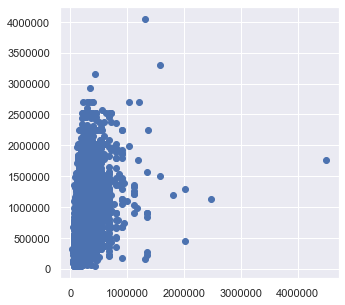

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


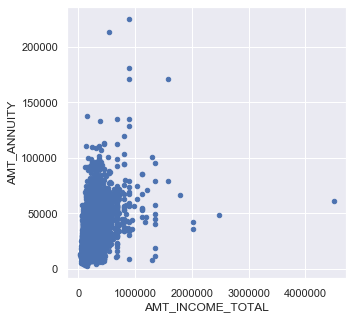

In [46]:
#plot the scatter plot of income and credit t variable in data
plt.scatter(df.AMT_INCOME_TOTAL,df.AMT_CREDIT)
plt.show()

#plot the scatter plot of income and annuity variable in data
df.plot.scatter(x="AMT_INCOME_TOTAL",y="AMT_ANNUITY")
plt.show()

### (ii) Previous Application Data

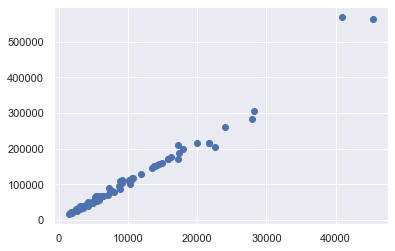

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


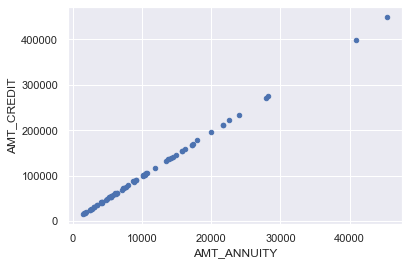

In [11]:
#plot the scatter plot of annuity and application variable in data
plt.scatter(df2.AMT_ANNUITY,df2.AMT_APPLICATION)
plt.show()

#plot the scatter plot of annuity and credit variable in data
df2.plot.scatter(x="AMT_ANNUITY",y="AMT_CREDIT")
plt.show()

- Amount of annuity and credit amount are linearly related and increase uniformly hand-in-hand

### a) Numeric-Numeric Analysis : Pairplot

### (i) Application Data

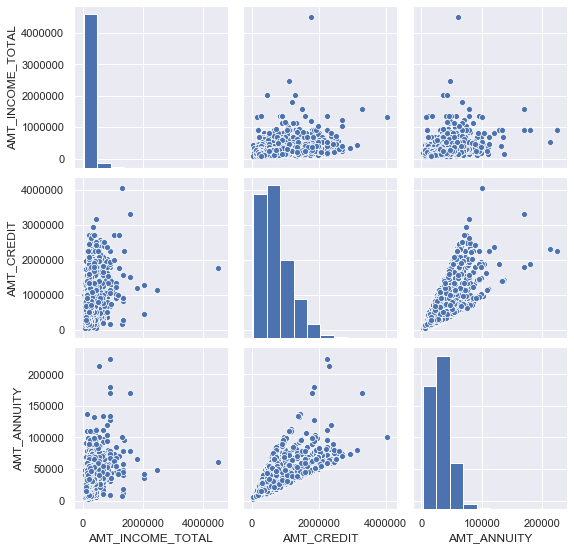

In [9]:
#plot the pair plot of income, credit and annuity in data dataframe.
sns.pairplot(data = df, vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'])
plt.show()

### (ii) Previous Application Data

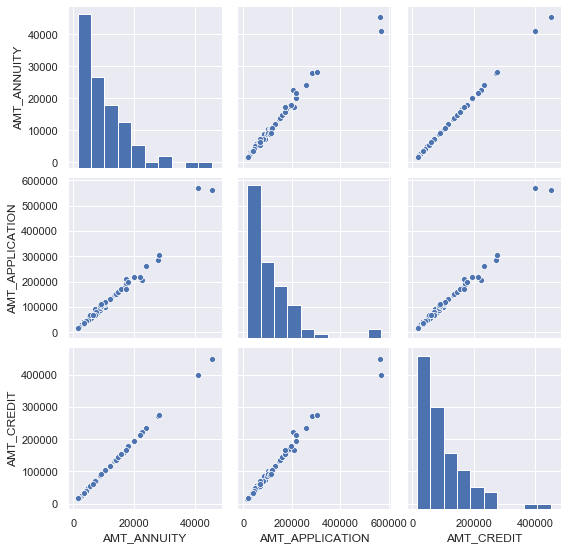

In [12]:
#plot the pair plot ofincome, application and credit in data dataframe.
sns.pairplot(data = df2, vars=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT'])
plt.show()

### a) Numeric-Numeric Analysis : Correlation Matrix

### (i) Application Data

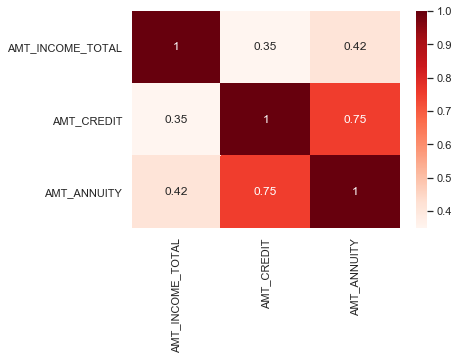

In [13]:
# Creating a matrix using income, credit, annuity as rows and columns
df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].corr()

#plot the correlation matrix of income, credit and annuity in data dataframe.
sns.heatmap(df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].corr(), annot=True, cmap = 'Reds')
plt.show()

### (ii) Previous Application Data

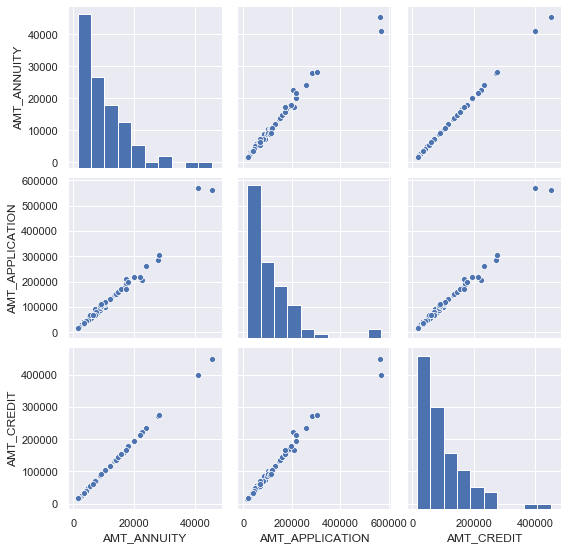

In [15]:
#plot the pair plot of annuity, application and credit in data dataframe.
sns.pairplot(data = df2, vars=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT'])
plt.show()

### b) Numeric - Categorical Analysis

### (i) Application Data

In [28]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [16]:
#groupby the response to find the mean of the income with response no & yes separately.
df.groupby('FLAG_OWN_CAR')['AMT_INCOME_TOTAL'].mean()

FLAG_OWN_CAR
Y    222872.414439
Name: AMT_INCOME_TOTAL, dtype: float64

In [17]:
df.groupby('FLAG_OWN_CAR')['AMT_INCOME_TOTAL'].median()

FLAG_OWN_CAR
Y    193500.0
Name: AMT_INCOME_TOTAL, dtype: float64

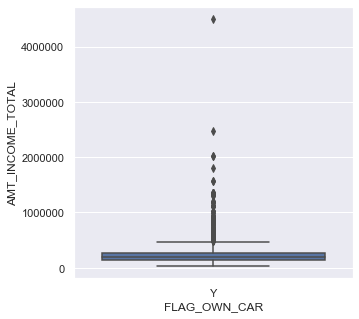

In [41]:
#plot the box plot of owning cars for yes & no responses.
sns.boxplot(df.FLAG_OWN_CAR, df.AMT_INCOME_TOTAL)
plt.show()

- Most applicants with decent income owned cars.

### c) Categorical — Categorical Analysis

### (i) Application Data

In [29]:
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
df['OWN_CAR_RATE'] = np.where(df.FLAG_OWN_CAR=='Y',1,0)
df.OWN_CAR_RATE.value_counts()

1    8602
Name: OWN_CAR_RATE, dtype: int64

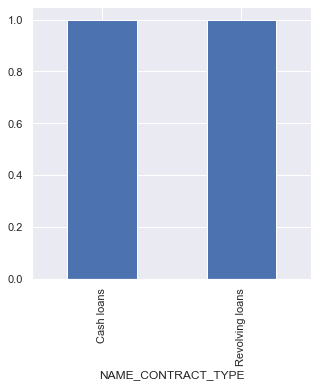

In [35]:
#plot the bar graph of loan type with average value of car owning rate
df.groupby('NAME_CONTRACT_TYPE')['OWN_CAR_RATE'].mean().plot.bar()
plt.show()

- Applicants opting for Cash and Revolving loans have equal probability of owning a car. 

## 10. Multivariate Analysis

## Heatmap

### (i) Application Data

In [61]:
#adjusting graph size for better visualization
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

CNT_CHILDREN                   0              1              2   \
NAME_CONTRACT_TYPE                                                
Cash loans          166048.589624  177834.772080  173428.947891   
Revolving loans     168782.268316  159059.547197  165484.802521   

CNT_CHILDREN                   3              4              5         6   \
NAME_CONTRACT_TYPE                                                          
Cash loans          173777.959021  168972.643979  178607.848101  145687.5   
Revolving loans     175417.904145  178563.829787  164700.000000  112500.0   

CNT_CHILDREN                   7         8         9        10        11  \
NAME_CONTRACT_TYPE                                                         
Cash loans          136928.571429  108000.0  225000.0  67500.0  315000.0   
Revolving loans               NaN       NaN       NaN      NaN       NaN   

CNT_CHILDREN              12        14        19  
NAME_CONTRACT_TYPE                                
Cash loans     

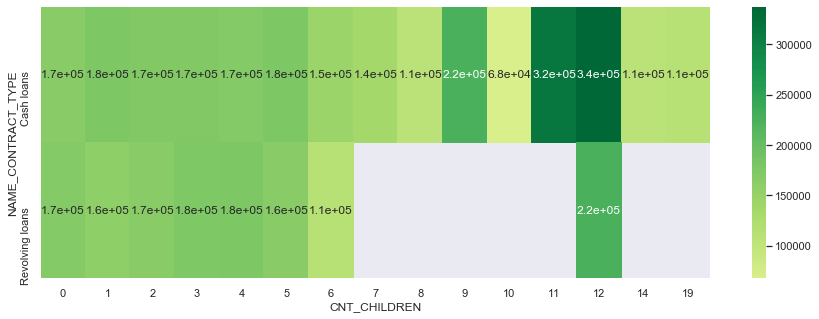

In [62]:
result = pd.pivot_table(data=df, index='NAME_CONTRACT_TYPE', columns='CNT_CHILDREN',values='AMT_INCOME_TOTAL')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

## Venn Diagram

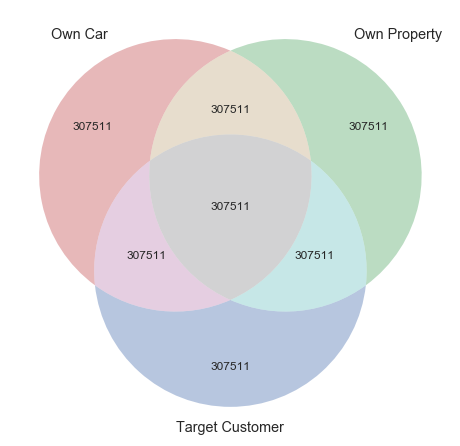

In [34]:
# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
df['OWN_CAR_RATE'] = np.where(df.FLAG_OWN_CAR=='Y',1,0)
df.OWN_CAR_RATE.value_counts()

df['OWN_REALTY_RATE'] = np.where(df.FLAG_OWN_REALTY=='Y',1,0)
df.OWN_CAR_RATE.value_counts()

# Make the diagram
venn3(subsets = (df['OWN_CAR_RATE'],df['OWN_REALTY_RATE'],df['TARGET']),set_labels = ('Own Car', 'Own Property','Target Customer'))
plt.show()


- Atleast 307511 applicants equally own car, property and happen to be target customers. 

Thus we have successfully evaluated the Loan Case Study Dataset and presented visually the graphs and plots of the data. We have made visible conclusions as mentioned after each graph. We can conclude that the data was efficiently cleaned and processed for an Exploratory Data Analysis. 

----------------------------------------------------------------------------------------THANK YOU---------------------------------------------------------------------------------------------------------